<a href="https://colab.research.google.com/github/shivansh2310/Finance-Stuff/blob/main/Rogers_Satchell_volatility_Nifty_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Download asset data from Yahoo Finance
ticker = "^NSEI"
start_date = "2020-04-01"
end_date = "2023-04-01"
data = yf.download(ticker, start=start_date, end=end_date)["Adj Close"]

# Calculate returns
returns = data.pct_change().dropna()



[*********************100%***********************]  1 of 1 completed


In [22]:
# Calculate standard deviation, skewness, and kurtosis
std = np.std(returns)
skew = np.mean((returns - np.mean(returns))**3) / std**3
kurtosis = np.mean((returns - np.mean(returns))**4) / std**4


In [23]:
kurtosis

9.274567987494926

In [24]:
# Calculate Rogers-Satchell volatility
rsv = std + (skew/6)*std**3 - ((kurtosis-3)/24)*std**4

In [25]:
rsv

0.011307631806088578

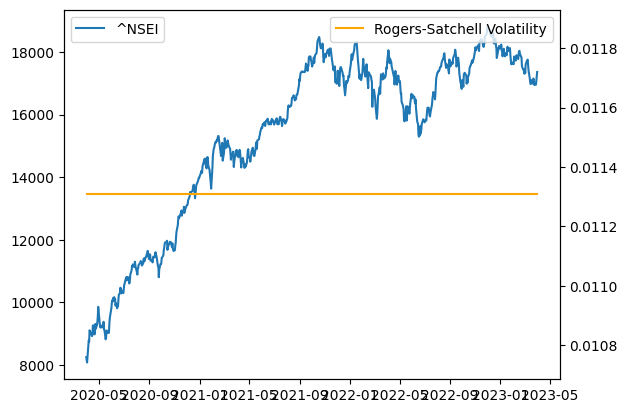

In [26]:
# Visualize the data and Rogers-Satchell volatility
fig, ax = plt.subplots()
ax.plot(data.index, data, label=ticker)
ax2 = ax.twinx()
ax2.plot(returns.index, rsv*np.ones_like(returns), label="Rogers-Satchell Volatility", color="orange")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

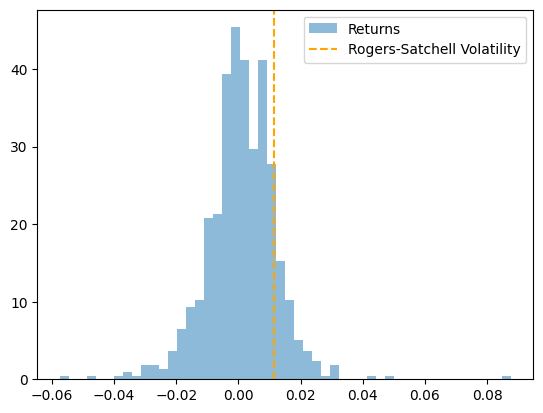

In [27]:
# Plot histogram of returns with Rogers-Satchell volatility line
fig, ax = plt.subplots()
ax.hist(returns, bins=50, density=True, alpha=0.5, label="Returns")
ax.axvline(x=rsv, color="orange", linestyle="--", label="Rogers-Satchell Volatility")
ax.legend(loc="upper right")
plt.show()

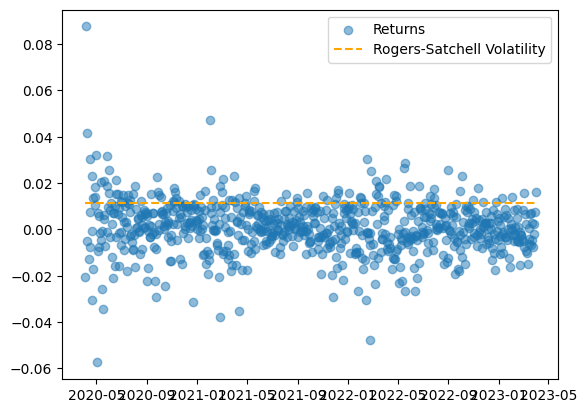

In [28]:
# Plot scatter plot of returns with Rogers-Satchell volatility line
fig, ax = plt.subplots()
ax.scatter(returns.index, returns, alpha=0.5, label="Returns")
ax.plot(returns.index, rsv*np.ones_like(returns), linestyle="--", color="orange", label="Rogers-Satchell Volatility")
ax.legend(loc="upper right")
plt.show()

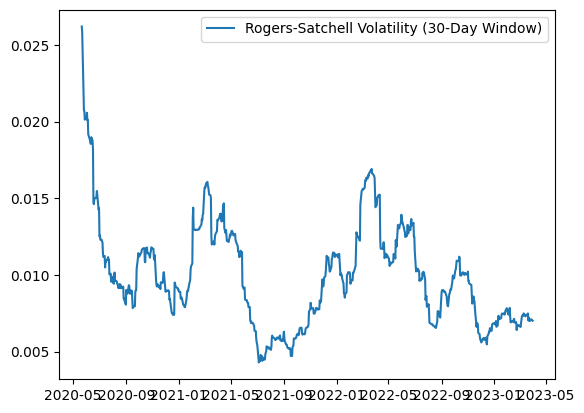

In [29]:
import pandas as pd
# Calculate rolling Rogers-Satchell volatility with 30-day window
rsv_rolling = pd.Series([np.nan]*len(returns), index=returns.index)
for i in range(30, len(returns)):
    std_i = np.std(returns.iloc[i-30:i])
    skew_i = np.mean((returns.iloc[i-30:i] - np.mean(returns.iloc[i-30:i]))**3) / std_i**3
    kurtosis_i = np.mean((returns.iloc[i-30:i] - np.mean(returns.iloc[i-30:i]))**4) / std_i**4
    rsv_i = std_i + (skew_i/6)*std_i**3 - ((kurtosis_i-3)/24)*std_i**4
    rsv_rolling.iloc[i] = rsv_i

# Plot rolling Rogers-Satchell volatility with 30-day window
fig, ax = plt.subplots()
ax.plot(rsv_rolling, label="Rogers-Satchell Volatility (30-Day Window)")
ax.legend(loc="upper right")
plt.show()

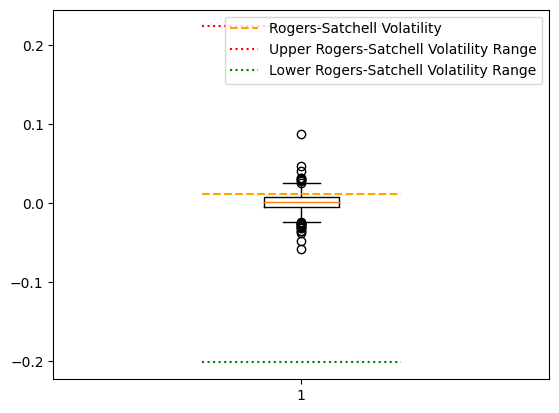

In [30]:
# Calculate upper and lower Rogers-Satchell volatility range
rsv_upper = rsv + 2*np.sqrt(rsv)
rsv_lower = rsv - 2*np.sqrt(rsv)

# Plot box plot of returns with Rogers-Satchell volatility range
fig, ax = plt.subplots()
ax.boxplot(returns, positions=[1])
ax.hlines(y=rsv, xmin=0.8, xmax=1.2, linestyle="--", color="orange", label="Rogers-Satchell Volatility")
ax.hlines(y=rsv_upper, xmin=0.8, xmax=1.2, linestyle=":", color="red", label="Upper Rogers-Satchell Volatility Range")
ax.hlines(y=rsv_lower, xmin=0.8, xmax=1.2, linestyle=":", color="green", label="Lower Rogers-Satchell Volatility Range")
ax.legend(loc="upper right")
plt.show()